In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://datasolut.com/clusteranalyse-kundensegmentierung-beispiel/

costumers = pd.read_csv('Downloads/archive/Mall_Customers.csv')
costumers.head(5)

# Annual Income = jährliches Einkommen
# Spending Score = Konsumverhalten als Score

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:ylabel='Age'>

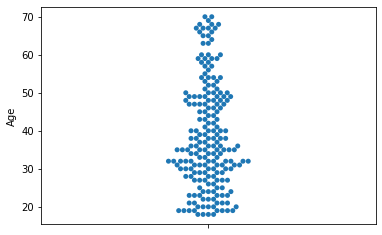

In [76]:

sns.swarmplot(y=costumers['Age'])

Female    112
Male       88
Name: Gender, dtype: int64
Index(['Female', 'Male'], dtype='object')
[112  88]


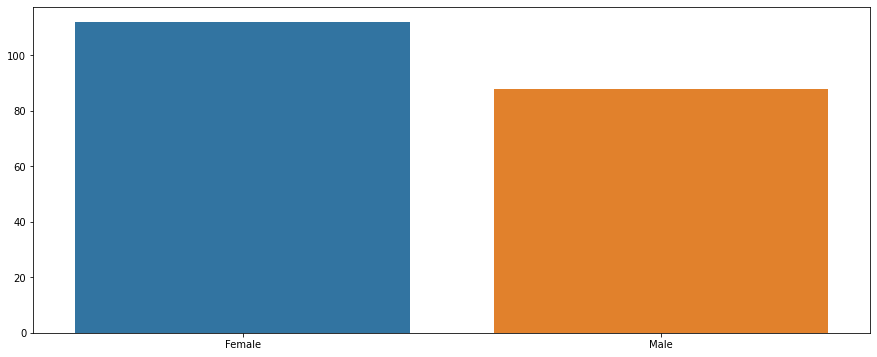

In [74]:
genders = costumers.Gender.value_counts()
print(genders)

plt.figure(figsize=(15,6))
sns.barplot(x=genders.index, y=genders.values)
print(genders.index)
print(genders.values)

Text(0, 0.5, 'Number of Costumers')

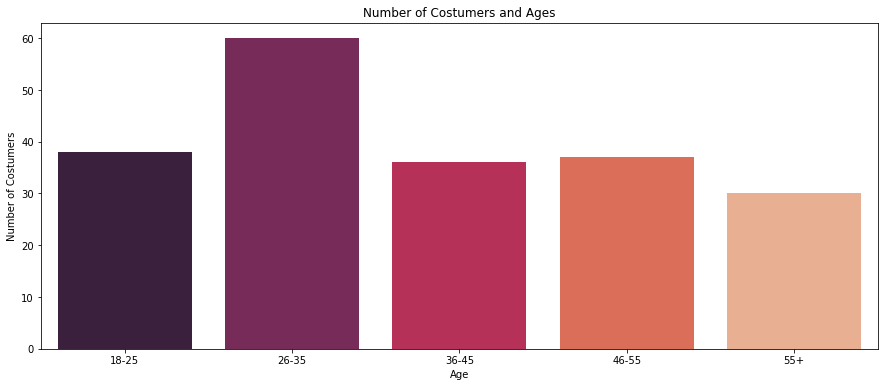

In [73]:
age18_25 = costumers.Age[(costumers.Age <= 25) & (costumers.Age >= 18)]
age26_35 = costumers.Age[(costumers.Age <= 35) & (costumers.Age >= 26)]
age36_45 = costumers.Age[(costumers.Age <= 45) & (costumers.Age >= 36)]
age46_55 = costumers.Age[(costumers.Age <= 55) & (costumers.Age >= 46)]
age55above = costumers.Age[costumers.Age >= 55]

x = ['18-25', '26-35', '36-45', '46-55', '55+']
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)] # Anzahl der Kunden in den Gruppen 
# age18_25.values
# len(agage18_25.values)

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette='rocket')
plt.title('Number of Costumers and Ages')
plt.xlabel('Age')
plt.ylabel('Number of Costumers')


Text(0, 0.5, 'Number of Costumers Having the Score')

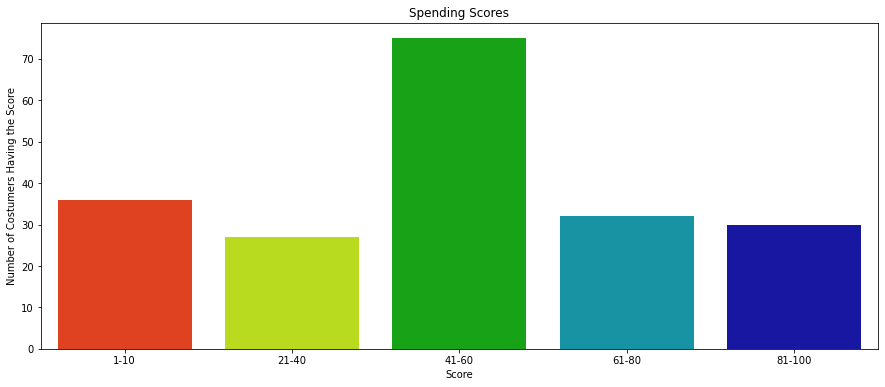

In [72]:
ss1_20 = costumers['Spending Score (1-100)'][(costumers['Spending Score (1-100)'] >= 1) & (costumers['Spending Score (1-100)'] <= 20)]
ss21_40 = costumers['Spending Score (1-100)'][(costumers['Spending Score (1-100)'] >= 21) & (costumers['Spending Score (1-100)'] <= 40)]
ss41_60 = costumers['Spending Score (1-100)'][(costumers['Spending Score (1-100)'] >= 41) & (costumers['Spending Score (1-100)'] <= 60)]
ss61_80 = costumers['Spending Score (1-100)'][(costumers['Spending Score (1-100)'] >= 61) & (costumers['Spending Score (1-100)'] <= 80)]
ss81_100 = costumers['Spending Score (1-100)'][(costumers['Spending Score (1-100)'] >= 81) & (costumers['Spending Score (1-100)'] <= 100)]

ssx = ['1-10', '21-40', '41-60', '61-80', '81-100']
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
#ss1_20.head()
#len(ss1_20)

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette='nipy_spectral_r')
plt.title('Spending Scores')
plt.xlabel('Score')
plt.ylabel('Number of Costumers Having the Score')

Text(0, 0.5, 'Number of Costumers')

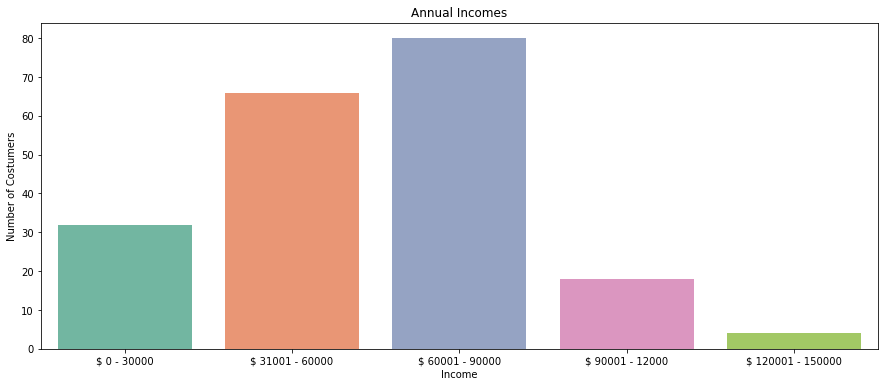

In [79]:
ai0_30 = costumers['Annual Income (k$)'][(costumers['Annual Income (k$)'] >= 0) & (costumers['Annual Income (k$)'] <= 30)]
ai31_60 = costumers['Annual Income (k$)'][(costumers['Annual Income (k$)'] >= 31) & (costumers['Annual Income (k$)'] <= 60)]
ai61_90 = costumers['Annual Income (k$)'][(costumers['Annual Income (k$)'] >= 61) & (costumers['Annual Income (k$)'] <= 90)]
ai91_120 = costumers['Annual Income (k$)'][(costumers['Annual Income (k$)'] >= 91) & (costumers['Annual Income (k$)'] <= 120)]
ai121_150 = costumers['Annual Income (k$)'][(costumers['Annual Income (k$)'] >= 121) & (costumers['Annual Income (k$)'] <= 150)]

aix = ['$ 0 - 30000', '$ 31001 - 60000', '$ 60001 - 90000', '$ 90001 - 12000', '$ 120001 - 150000']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette='Set2')
plt.title('Annual Incomes')
plt.xlabel('Income')
plt.ylabel('Number of Costumers')

Text(0, 0.5, 'WCSS')

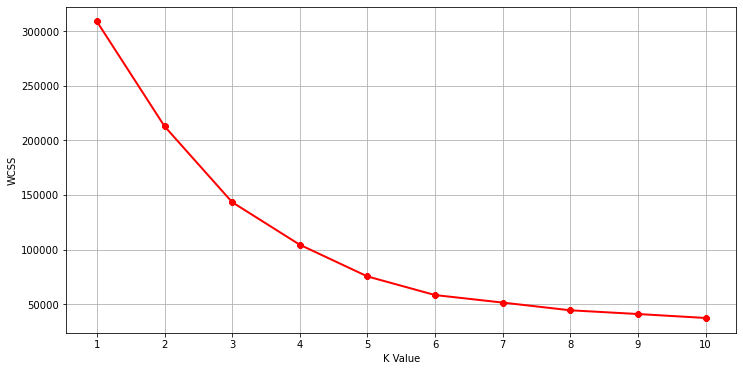

In [109]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(costumers.iloc[:,2:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xlabel('K Value')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')


In [108]:
costumers.iloc[:1,:]


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [107]:
costumers.iloc[:1,2:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39


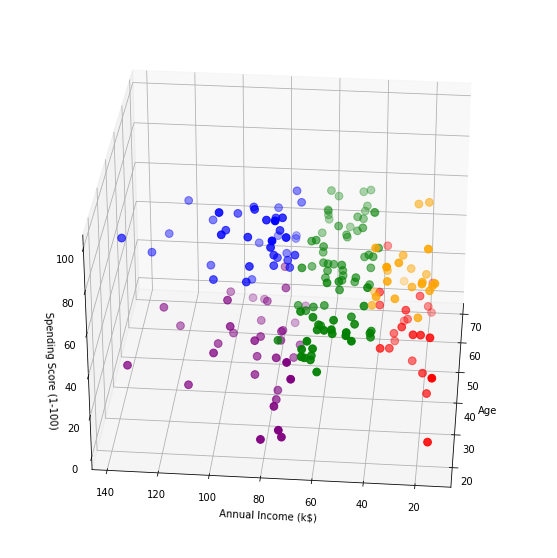

In [114]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(costumers.iloc[:,2:])
costumers["label"] = clusters
 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
  
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(costumers.Age[costumers.label == 0], costumers["Annual Income (k$)"][costumers.label == 0], costumers["Spending Score (1-100)"][costumers.label == 0], c='blue', s=60)
ax.scatter(costumers.Age[costumers.label == 1], costumers["Annual Income (k$)"][costumers.label == 1], costumers["Spending Score (1-100)"][costumers.label == 1], c='red', s=60)
ax.scatter(costumers.Age[costumers.label == 2], costumers["Annual Income (k$)"][costumers.label == 2], costumers["Spending Score (1-100)"][costumers.label == 2], c='green', s=60)
ax.scatter(costumers.Age[costumers.label == 3], costumers["Annual Income (k$)"][costumers.label == 3], costumers["Spending Score (1-100)"][costumers.label == 3], c='orange', s=60)
ax.scatter(costumers.Age[costumers.label == 4], costumers["Annual Income (k$)"][costumers.label == 4], costumers["Spending Score (1-100)"][costumers.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

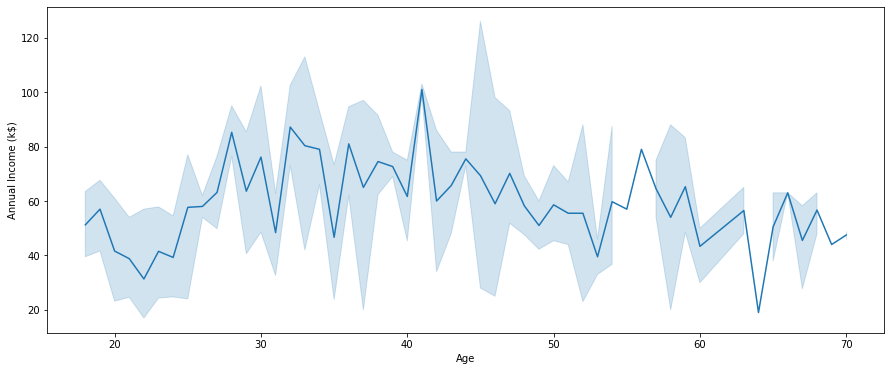

In [77]:
plt.figure(figsize=(15,6))
sns.lineplot(x=costumers['Age'], y=costumers['Annual Income (k$)'])